**TARGET_deathRate**: Dependent variable. Mean per capita (100,000) cancer mortalities(a)

**avgAnnCount**: Mean number of reported cases of cancer diagnosed annually(a)

**avgDeathsPerYear**: Mean number of reported mortalities due to cancer(a)

**incidenceRate**: Mean per capita (100,000) cancer diagoses(a)

**medianIncome**: Median income per county (b)

**popEst2015**: Population of county (b)

**povertyPercent**: Percent of populace in poverty (b)

**studyPerCap**: Per capita number of cancer-related clinical trials per county (a)

**binnedInc**: Median income per capita binned by decile (b)

**MedianAge**: Median age of county residents (b)

**MedianAgeMale**: Median age of male county residents (b)

**MedianAgeFemale**: Median age of female county residents (b)

**Geography**: County name (b)

**AvgHouseholdSize**: Mean household size of county (b)

**PercentMarried**: Percent of county residents who are married (b)

**PctNoHS18_24**: Percent of county residents ages 18-24 highest education attained: less than high school (b)

**PctHS18_24**: Percent of county residents ages 18-24 highest education attained: high school diploma (b)

**PctSomeCol18_24**: Percent of county residents ages 18-24 highest education attained: some college (b)

**PctBachDeg18_24**: Percent of county residents ages 18-24 highest education attained: bachelor's degree (b)

**PctHS25_Over**: Percent of county residents ages 25 and over highest education attained: high school diploma (b)

**PctBachDeg25_Over**: Percent of county residents ages 25 and over highest education attained: bachelor's degree (b)

**PctEmployed16_Over**: Percent of county residents ages 16 and over employed (b)

**PctUnemployed16_Over**: Percent of county residents ages 16 and over unemployed (b)

**PctPrivateCoverage**: Percent of county residents with private health coverage (b)

**PctPrivateCoverageAlone**: Percent of county residents with private health coverage alone (no public assistance) (b)

**PctEmpPrivCoverage**: Percent of county residents with employee-provided private health coverage (b)

**PctPublicCoverage**: Percent of county residents with government-provided health coverage (b)

**PctPublicCoverageAlone**: Percent of county residents with government-provided health coverage alone (b)

**PctWhite**: Percent of county residents who identify as White (b)

**PctBlack**: Percent of county residents who identify as Black (b)

**PctAsian**: Percent of county residents who identify as Asian (b)

**PctOtherRace**: Percent of county residents who identify in a category which is not White, Black, or Asian (b)

**PctMarriedHouseholds**: Percent of married households (b)

**BirthRate**: Number of live births relative to number of women in county (b)

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from pandas_profiling import ProfileReport
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
pd.set_option("display.max.columns", None)

In [5]:
import pandas as pd
df = pd.read_csv('https://query.data.world/s/fqz3z5pii3cpedbaevzfuixm3ju6gc', encoding='iso-8859-1')
df.shape

(3047, 34)

In [8]:
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,41.7,"Kitsap County, Washington",2.54,52.5,11.5,39.5,42.1,6.9,23.2,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,32.2,33.7,"Kittitas County, Washington",2.34,44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,45.8,"Klickitat County, Washington",2.62,54.2,24.0,36.6,NaN,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,42.2,43.4,"Lewis County, Washington",2.52,52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,47.8,48.9,"Lincoln County, Washington",2.34,57.8,14.9,43.0,40.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [11]:
df.columns = map(str.lower, df.columns)

<AxesSubplot:>

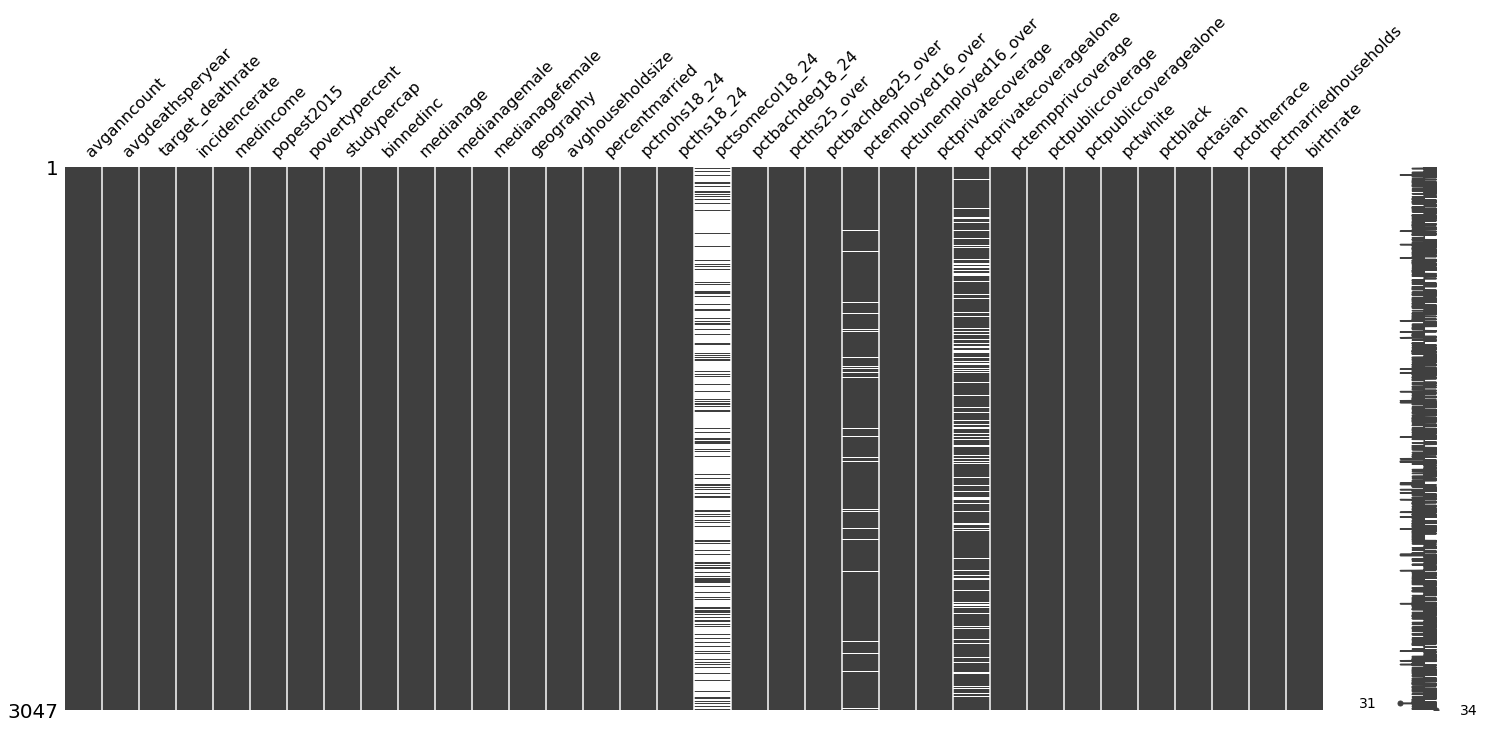

In [12]:
msno.matrix(df)

In [13]:
df.isna().sum()

avganncount                   0
avgdeathsperyear              0
target_deathrate              0
incidencerate                 0
medincome                     0
popest2015                    0
povertypercent                0
studypercap                   0
binnedinc                     0
medianage                     0
medianagemale                 0
medianagefemale               0
geography                     0
avghouseholdsize              0
percentmarried                0
pctnohs18_24                  0
pcths18_24                    0
pctsomecol18_24            2285
pctbachdeg18_24               0
pcths25_over                  0
pctbachdeg25_over             0
pctemployed16_over          152
pctunemployed16_over          0
pctprivatecoverage            0
pctprivatecoveragealone     609
pctempprivcoverage            0
pctpubliccoverage             0
pctpubliccoveragealone        0
pctwhite                      0
pctblack                      0
pctasian                      0
pctother

In [14]:
old_colvalues = df[['pctsomecol18_24','pctemployed16_over','pctprivatecoveragealone']]
old_colvalues

,pctsomecol18_24,pctemployed16_over,pctprivatecoveragealone
0,42.1,51.9,NaN
1,64.0,55.9,53.8
2,NaN,45.9,43.5
3,36.1,48.3,40.3
4,40.0,48.2,43.9
...,...,...,...
3042,NaN,51.7,54.9
3043,35.6,70.1,53.3
3044,33.3,64.8,52.6
3045,NaN,NaN,56.3


In [15]:
df.fillna(df.mean(),inplace=True)

In [16]:
df.isna().sum()

avganncount                0
avgdeathsperyear           0
target_deathrate           0
incidencerate              0
medincome                  0
popest2015                 0
povertypercent             0
studypercap                0
binnedinc                  0
medianage                  0
medianagemale              0
medianagefemale            0
geography                  0
avghouseholdsize           0
percentmarried             0
pctnohs18_24               0
pcths18_24                 0
pctsomecol18_24            0
pctbachdeg18_24            0
pcths25_over               0
pctbachdeg25_over          0
pctemployed16_over         0
pctunemployed16_over       0
pctprivatecoverage         0
pctprivatecoveragealone    0
pctempprivcoverage         0
pctpubliccoverage          0
pctpubliccoveragealone     0
pctwhite                   0
pctblack                   0
pctasian                   0
pctotherrace               0
pctmarriedhouseholds       0
birthrate                  0
dtype: int64

In [17]:
print(old_colvalues)
print('\n')
print(df[['pctsomecol18_24','pctemployed16_over','pctprivatecoveragealone']])

      pctsomecol18_24  pctemployed16_over  pctprivatecoveragealone
0                42.1                51.9                      NaN
1                64.0                55.9                     53.8
2                 NaN                45.9                     43.5
3                36.1                48.3                     40.3
4                40.0                48.2                     43.9
...               ...                 ...                      ...
3042              NaN                51.7                     54.9
3043             35.6                70.1                     53.3
3044             33.3                64.8                     52.6
3045              NaN                 NaN                     56.3
3046             43.9                48.8                     60.3

[3047 rows x 3 columns]


      pctsomecol18_24  pctemployed16_over  pctprivatecoveragealone
0           42.100000           51.900000                48.453774
1           64.000000           55.

In [18]:
df.columns

Index(['avganncount', 'avgdeathsperyear', 'target_deathrate', 'incidencerate',
       'medincome', 'popest2015', 'povertypercent', 'studypercap', 'binnedinc',
       'medianage', 'medianagemale', 'medianagefemale', 'geography',
       'avghouseholdsize', 'percentmarried', 'pctnohs18_24', 'pcths18_24',
       'pctsomecol18_24', 'pctbachdeg18_24', 'pcths25_over',
       'pctbachdeg25_over', 'pctemployed16_over', 'pctunemployed16_over',
       'pctprivatecoverage', 'pctprivatecoveragealone', 'pctempprivcoverage',
       'pctpubliccoverage', 'pctpubliccoveragealone', 'pctwhite', 'pctblack',
       'pctasian', 'pctotherrace', 'pctmarriedhouseholds', 'birthrate'],
      dtype='object')

In [19]:
corr = df.corr(method='pearson')
corr = corr.sort_values(by=['target_deathrate'],ascending=False)
corr

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,medianagefemale,avghouseholdsize,percentmarried,pctnohs18_24,pcths18_24,pctsomecol18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
target_deathrate,-0.143532,-0.090715,1.000000,0.449432,-0.428615,-0.120073,0.429389,-0.022285,0.004375,-0.021929,0.012048,-0.036905,-0.266820,0.088463,0.261976,-0.094765,-0.287817,0.404589,-0.485477,-0.397487,0.378412,-0.386066,-0.326067,-0.267399,0.404572,0.449358,-0.177400,0.257024,-0.186331,-0.189894,-0.293325,-0.087407
incidencerate,0.073553,0.062690,0.449432,1.000000,-0.001036,0.026912,0.009046,0.077283,0.018089,-0.014733,-0.009106,-0.118400,-0.119524,-0.170762,0.022644,0.038442,0.046835,0.121725,-0.038177,0.004622,0.099979,0.105174,0.098846,0.149825,0.046109,0.040812,-0.014510,0.113489,-0.008123,-0.208748,-0.152176,-0.118181
pctpubliccoveragealone,-0.093699,-0.027338,0.449358,0.040812,-0.719756,-0.041469,0.798642,-0.055512,-0.003298,0.002479,0.047659,0.061115,-0.459990,0.327270,0.234124,-0.155653,-0.421805,0.297143,-0.605760,-0.694092,0.655366,-0.886234,-0.769590,-0.728823,0.865833,1.000000,-0.361026,0.330110,-0.181380,0.083755,-0.473994,-0.004753
povertypercent,-0.135694,-0.066918,0.429389,0.009046,-0.788965,-0.065299,1.000000,-0.055652,-0.029280,-0.214001,-0.148164,0.074308,-0.642857,0.288106,0.094211,-0.079355,-0.387122,0.194361,-0.531600,-0.719972,0.655148,-0.822534,-0.682760,-0.683100,0.651162,0.798642,-0.509433,0.511530,-0.157289,0.047096,-0.604953,-0.012283
pcths25_over,-0.311375,-0.295929,0.404589,0.121725,-0.471348,-0.311849,0.194361,-0.085128,0.036587,0.318277,0.344840,-0.138728,0.102434,0.217069,0.438929,-0.184084,-0.384049,1.000000,-0.740611,-0.337687,0.082306,-0.221935,-0.274811,-0.222803,0.427974,0.297143,0.188045,-0.024445,-0.436561,-0.285611,0.062176,0.016600
pctpubliccoverage,-0.173548,-0.131687,0.404572,0.046109,-0.754822,-0.160066,0.651162,-0.051497,0.049060,0.398967,0.455496,-0.134812,-0.246972,0.318540,0.278220,-0.172834,-0.422470,0.427974,-0.636095,-0.751364,0.529821,-0.720012,-0.770221,-0.778315,1.000000,0.865833,-0.133705,0.195597,-0.305625,-0.078708,-0.362171,-0.030531
pctunemployed16_over,-0.009016,0.069701,0.378412,0.099979,-0.453108,0.050768,0.655148,-0.031957,0.018590,-0.142737,-0.111161,0.131506,-0.551483,0.181193,0.130694,-0.061204,-0.308920,0.082306,-0.372980,-0.631548,1.000000,-0.634317,-0.522160,-0.474745,0.529821,0.655366,-0.501755,0.469273,-0.022020,0.028463,-0.469609,-0.067906
pcths18_24,-0.182054,-0.151418,0.261976,0.022644,-0.190006,-0.151821,0.094211,-0.057035,0.050574,0.241310,0.242827,0.027228,0.132792,0.084629,1.000000,-0.387677,-0.389334,0.438929,-0.404754,-0.263649,0.130694,-0.253851,-0.260841,-0.244494,0.278220,0.234124,0.045306,-0.024868,-0.199770,-0.060415,0.120040,0.058227
pctblack,0.031376,0.084607,0.257024,0.113489,-0.270232,0.073044,0.511530,-0.019761,-0.017173,-0.242748,-0.156728,0.030278,-0.622357,0.116805,-0.024868,-0.039761,-0.093614,-0.024445,-0.146409,-0.328480,0.469273,-0.345172,-0.250061,-0.237388,0.195597,0.330110,-0.828459,1.000000,0.016583,-0.023001,-0.573592,-0.067805
pctnohs18_24,-0.143327,-0.136794,0.088463,-0.170762,-0.289383,-0.126582,0.288106,-0.090387,0.006178,0.100486,0.136361,0.064719,-0.012375,1.000000,0.084629,-0.319081,-0.381422,0.217069,-0.396579,-0.336778,0.181193,-0.454751,-0.409673,-0.429994,0.318540,0.327270,-0.157282,0.116805,-0.217535,0.126256,0.005340,0.125895


<AxesSubplot:>

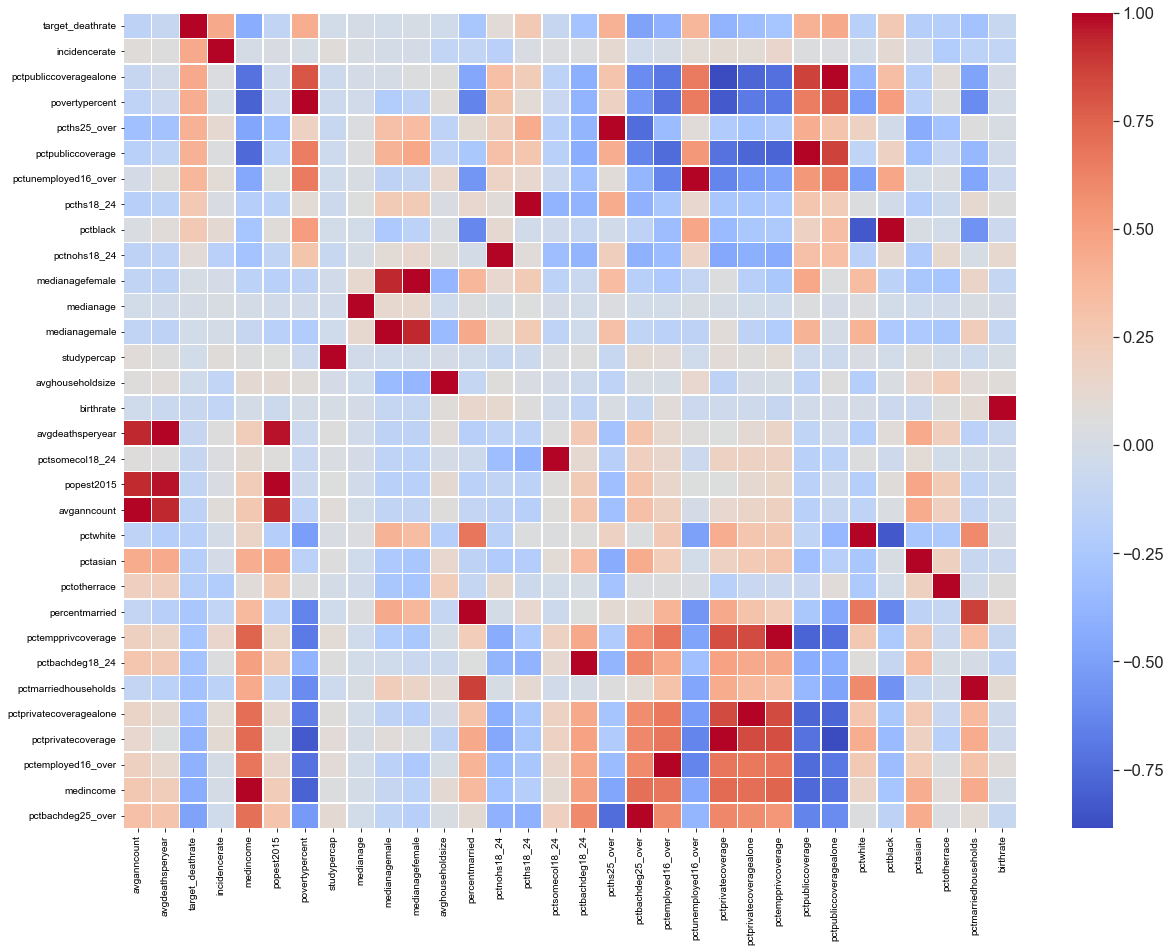

In [20]:
plt.clf
fig, ax = plt.subplots(figsize=(20,15))  
sns.set(font_scale=1.5)
sns.heatmap(corr, ax=ax, linewidths=0.5, cmap='coolwarm')

In [27]:
print('Cancer Diagnosis & Mortality Correlation = ', corr.loc['incidencerate', 'target_deathrate'])
print('Government Provided Insurance Alone & Mortality Correlation = ', corr.loc['pctpubliccoveragealone','target_deathrate'])
print('Poverty Percentage & Mortality Correlation = ', corr.loc['povertypercent', 'target_deathrate'])

Cancer Diagnosis & Mortality Correlation =  0.44943169756144524
Government Provided Insurance Alone & Mortality Correlation =  0.4493575757853337
Poverty Percentage & Mortality Correlation =  0.4293889802564514


In [28]:
df.dtypes != "object"

avganncount                 True
avgdeathsperyear            True
target_deathrate            True
incidencerate               True
medincome                   True
popest2015                  True
povertypercent              True
studypercap                 True
binnedinc                  False
medianage                   True
medianagemale               True
medianagefemale             True
geography                  False
avghouseholdsize            True
percentmarried              True
pctnohs18_24                True
pcths18_24                  True
pctsomecol18_24             True
pctbachdeg18_24             True
pcths25_over                True
pctbachdeg25_over           True
pctemployed16_over          True
pctunemployed16_over        True
pctprivatecoverage          True
pctprivatecoveragealone     True
pctempprivcoverage          True
pctpubliccoverage           True
pctpubliccoveragealone      True
pctwhite                    True
pctblack                    True
pctasian  

In [29]:
df.drop(columns=['binnedinc','geography'], inplace=True)
df.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,medianagefemale,avghouseholdsize,percentmarried,pctnohs18_24,pcths18_24,pctsomecol18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,39.3,36.9,41.7,2.54,52.5,11.5,39.5,42.100000,6.9,23.2,19.6,51.9,8.0,75.1,48.453774,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,33.0,32.2,33.7,2.34,44.5,6.1,22.4,64.000000,7.5,26.0,22.7,55.9,7.8,70.2,53.800000,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,45.0,44.0,45.8,2.62,54.2,24.0,36.6,40.977034,9.5,29.0,16.0,45.9,7.0,63.7,43.500000,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,42.8,42.2,43.4,2.52,52.7,20.2,41.2,36.100000,2.5,31.6,9.3,48.3,12.1,58.4,40.300000,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,48.3,47.8,48.9,2.34,57.8,14.9,43.0,40.000000,2.0,33.4,15.0,48.2,4.8,61.6,43.900000,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [116]:
X = df['povertypercent'].values.reshape(-1,1)
y = df['target_deathrate'].values.reshape(-1,1)

In [117]:
print(X[:10])
print('\n')
print(y[:10])

[[11.2]
 [18.6]
 [14.6]
 [17.1]
 [12.5]
 [15.6]
 [23.2]
 [17.8]
 [22.3]
 [13.1]]


[[164.9]
 [161.3]
 [174.7]
 [194.8]
 [144.4]
 [176. ]
 [175.9]
 [183.6]
 [190.5]
 [177.8]]


In [118]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y)

In [119]:
lm = linear_model.LinearRegression()
model = lm.fit(X1_train,y1_train)

In [120]:
model.score(X1_train,y1_train)

0.18995155056589508

In [121]:
model.coef_

array([[1.9235167]])

In [122]:
model.intercept_

array([146.28554288])

In [123]:
print(X1_test.shape)
print(y1_test.shape)

(762, 1)
(762, 1)


In [124]:
y1_pred = model.predict(X1_test)

In [125]:
output = pd.DataFrame({'Actual': y1_test.flatten(), 'Predicted': y1_pred.flatten()})
output['Error'] =  output['Actual'] - output['Predicted']
output

,Actual,Predicted,Error
0,173.3,208.607484,-35.307484
1,202.7,190.526427,12.173573
2,167.5,176.677107,-9.177107
3,190.6,192.449944,-1.849944
4,153.2,170.329502,-17.129502
...,...,...,...
757,159.0,167.444227,-8.444227
758,168.0,168.598337,-0.598337
759,153.8,173.022425,-19.222425
760,162.9,159.365456,3.534544


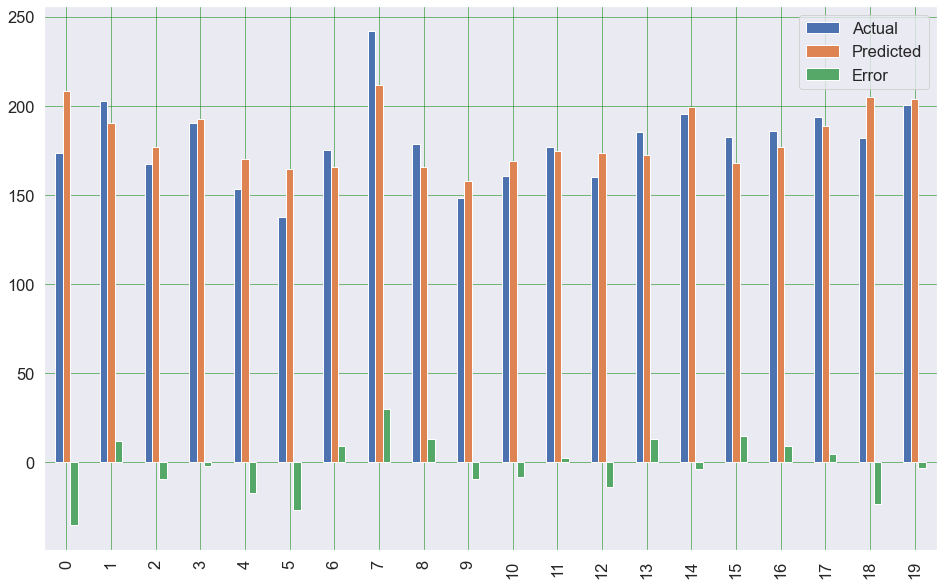

In [126]:
difplot = output.head(20)
difplot.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

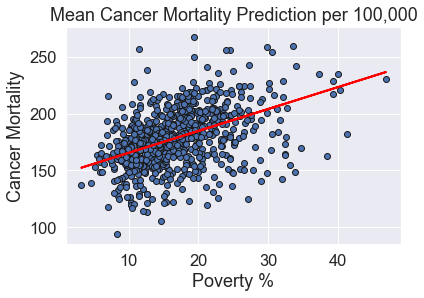

In [127]:
plt.scatter(X1_test,y1_test,edgecolors='k')
plt.plot(X1_test,y1_pred,color='red',linewidth=2)
plt.title('Mean Cancer Mortality Prediction per 100,000')
plt.ylabel('Cancer Mortality')
plt.xlabel('Poverty %')
plt.show()

In [128]:
r_square= model.score(X1_train, y1_train)
print('Coefficient of determination(R square):',r_square)
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y1_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y1_test,y1_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))

Coefficient of determination(R square): 0.18995155056589508
Mean Absolute Error: 17.828705306213585
Mean Squared Error: 544.1827072715076
Root Mean Squared Error: 23.327724005386973


### Switching to Multivariate

In [129]:
df_mult = df.copy()
df_mult.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,medianagefemale,avghouseholdsize,percentmarried,pctnohs18_24,pcths18_24,pctsomecol18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,39.3,36.9,41.7,2.54,52.5,11.5,39.5,42.100000,6.9,23.2,19.6,51.9,8.0,75.1,48.453774,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,33.0,32.2,33.7,2.34,44.5,6.1,22.4,64.000000,7.5,26.0,22.7,55.9,7.8,70.2,53.800000,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,45.0,44.0,45.8,2.62,54.2,24.0,36.6,40.977034,9.5,29.0,16.0,45.9,7.0,63.7,43.500000,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,42.8,42.2,43.4,2.52,52.7,20.2,41.2,36.100000,2.5,31.6,9.3,48.3,12.1,58.4,40.300000,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,48.3,47.8,48.9,2.34,57.8,14.9,43.0,40.000000,2.0,33.4,15.0,48.2,4.8,61.6,43.900000,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [130]:
X = df_mult[['povertypercent','incidencerate','pctpubliccoveragealone']]
y = df_mult['target_deathrate']

In [131]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y)

In [132]:
lm = linear_model.LinearRegression()
mult_model = lm.fit(X2_train,y2_train)

In [135]:
y2_pred = mult_model.predict(X2_test)

In [136]:
mult_output = pd.DataFrame({'Actual': y2_test, 'Predicted': y2_pred.flatten()})
mult_output['Error'] =  mult_output['Actual'] - mult_output['Predicted']
mult_output.reset_index(drop=True,inplace=True)
mult_output

,Actual,Predicted,Error
0,184.8,159.112226,25.687774
1,191.7,188.813732,2.886268
2,154.3,168.478734,-14.178734
3,150.9,165.911037,-15.011037
4,232.0,201.756143,30.243857
...,...,...,...
757,184.9,186.488528,-1.588528
758,151.3,183.701227,-32.401227
759,216.1,205.164841,10.935159
760,216.3,208.372214,7.927786


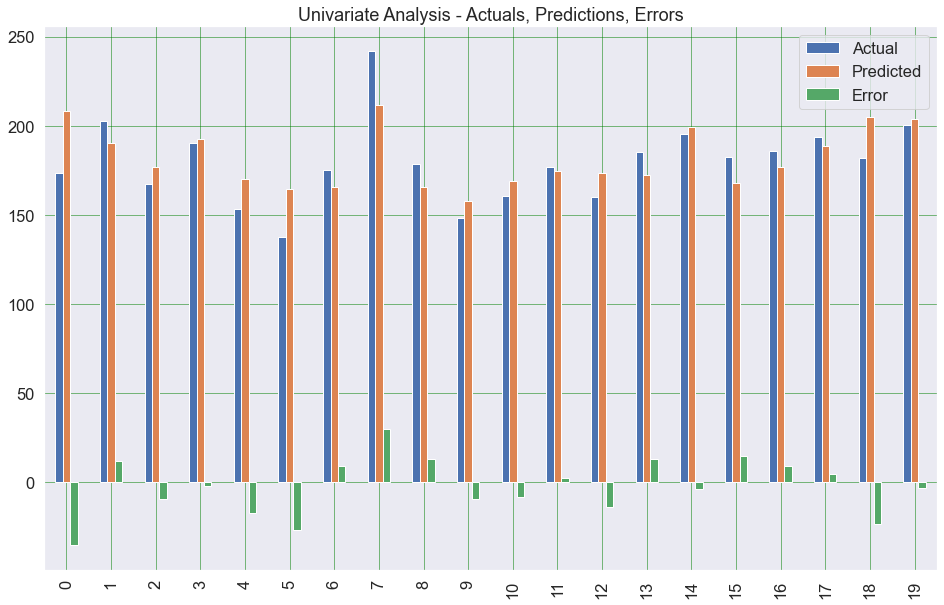

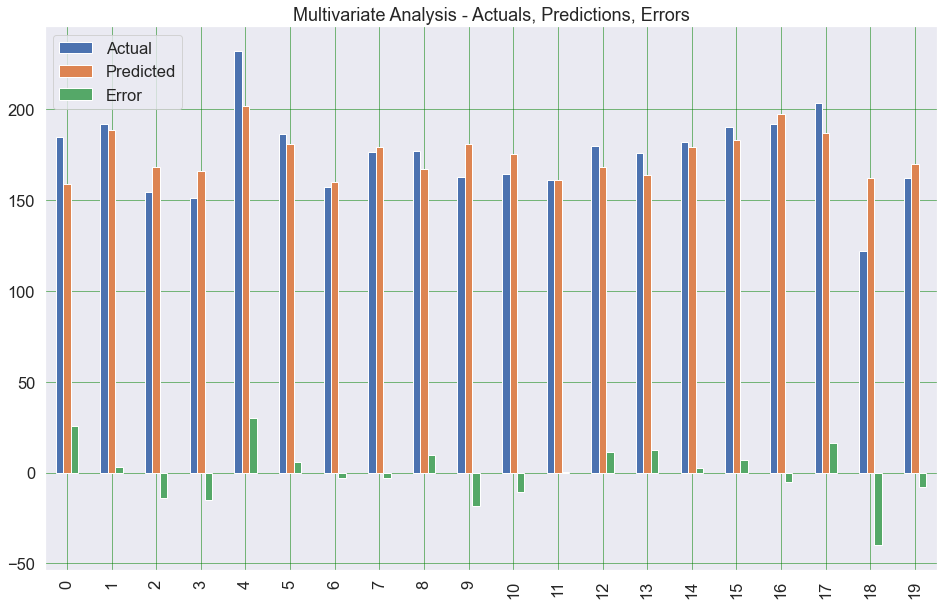

In [147]:
difplot = output.head(20)
difplot.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.title('Univariate Analysis - Actuals, Predictions, Errors')
plt.show()

difplot2 = mult_output.head(20)
difplot2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.title('Multivariate Analysis - Actuals, Predictions, Errors')
plt.show()


In [145]:
print('Univariate Linear Regression Metrics:', '\n')
r_square= model.score(X1_train, y1_train)
print('Coefficient of determination(R square):',r_square)
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y1_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y1_test,y1_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))
print('\n')

print('Multivariate Linear Regression Metrics:', '\n')
r_square= mult_model.score(X2_train, y2_train)
print('Coefficient of determination(R square):',r_square)
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, y2_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, y2_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))

Univariate Linear Regression Metrics: 

Coefficient of determination(R square): 0.18995155056589508
Mean Absolute Error: 17.828705306213585
Mean Squared Error: 544.1827072715076
Root Mean Squared Error: 23.327724005386973


Multivariate Linear Regression Metrics: 

Coefficient of determination(R square): 0.41553398932364694
Mean Absolute Error: 16.365810549313093
Mean Squared Error: 453.60542053215886
Root Mean Squared Error: 21.298014473940025
